In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/anaconda/Desktop/Code/EC')
%aimport experiments_code_s2p
import experiments_code_s2p as ec
import numpy as np
from scipy.stats import kstest, mannwhitneyu, pearsonr
import seaborn as sns
import pandas as pd
from tqdm import notebook
from matplotlib.pyplot import figure
from glob import glob
import matplotlib.pyplot as plt

In [3]:
e_l = ec.load_experiments('main')

  0%|          | 0/208 [00:00<?, ?it/s]

149 main experiments loaded


In [4]:
def dff(raw_traces):
    frame_rate = 8.41
    seconds_n = 60
    starting_frame = round(seconds_n*frame_rate)
    dff_traces = []
    for cell_activity in raw_traces:
        cell_dff = []
        if np.sum(cell_activity) > 0:
            for i in range(starting_frame, len(cell_activity)):
                F0 = np.median(cell_activity[i-starting_frame:i])
                cell_dff.append((cell_activity[i] - F0)/F0)
            dff_traces.append(cell_dff)
        else:
            dff_traces.append(np.zeros(15000-starting_frame))
    return np.array(dff_traces)

In [6]:
# Stimulated cells

responses = []
mean_baseline = []
spikes_baseline = []
dff_baseline = []

for e in e_l:
    for c in e.stim_cell_number_l:
        responses.append(sum(e.response))
        mean_baseline.append(np.mean(e.raw_traces[c][:e.stim_first_frames[0]]))
        spikes_baseline.append(sum(np.where(e.spks[c] > np.quantile(e.spks[c][:e.stim_first_frames[0]], 0.95), 1, 0)))
        dff_baseline.append(np.mean(dff([e.raw_traces[c][:e.stim_first_frames[0]]])))

title = ''

'''
# Neg modulated cells

responses = []
mean_baseline = []
spikes_baseline = []
dff_baseline = []

for e in e_l:
    if isinstance(e.neg_mod_cells, list):
        for c in e.neg_mod_cells:
            responses.append(sum(e.response))
            mean_baseline.append(np.mean(e.raw_traces[c][:e.stim_first_frames[0]]))
            spikes_baseline.append(sum(np.where(e.spks[c] > np.quantile(e.spks[c][:e.stim_first_frames[0]], 0.95), 1, 0)))
            dff_baseline.append(np.mean(dff([e.raw_traces[c][:e.stim_first_frames[0]]])))

title = 'Neg mod cells'
'''

"\n# Neg modulated cells\n\nresponses = []\nmean_baseline = []\nspikes_baseline = []\ndff_baseline = []\n\nfor e in e_l:\n    if isinstance(e.neg_mod_cells, list):\n        for c in e.neg_mod_cells:\n            responses.append(sum(e.response))\n            mean_baseline.append(np.mean(e.raw_traces[c][:e.stim_first_frames[0]]))\n            spikes_baseline.append(sum(np.where(e.spks[c] > np.quantile(e.spks[c][:e.stim_first_frames[0]], 0.95), 1, 0)))\n            dff_baseline.append(np.mean(dff([e.raw_traces[c][:e.stim_first_frames[0]]])))\n\ntitle = 'Neg mod cells'\n"

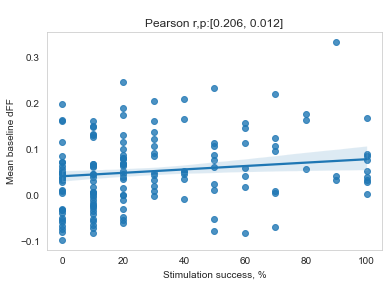

In [11]:
x=10*np.array(responses)
y=dff_baseline

sns.regplot(x=x, y=y,  x_jitter=0, y_jitter=.1).set(title=f'{title}\nPearson r,p:{[round(i,3) for i in pearsonr(x, y)]}')
plt.xlabel('Stimulation success, %')
plt.ylabel('Mean baseline dFF')
plt.grid(None)
plt.savefig('/Users/anaconda/Desktop/Analysis results/baseline2stim_succ.svg')

In [9]:
print(f'Of note, cells displaying higher baseline activity exhibited a greater success rate '
      f'(Pearson r={[round(i,3) for i in pearsonr(x, y)][0]}, p={[round(i,3) for i in pearsonr(x, y)][1]})')

Of note, cells displaying higher baseline activity exhibited a greater success rate (Pearson r=0.206, p=0.012)
